In [1]:
using Plots
using DataFrames
gr()

Plots.GRBackend()

In [2]:
function swap_list_from(list::Array{T,1}, from::Int, to=len(list)::Int)::Array{T,1} where T<:Number
  len = list |> length
  list[from:to] = list[from:to] |> reverse
  return list
end

function sort_sub_list(list::Array{T, 1}, left::Int, right::Int, log=false::Bool) where T<:Number
  len = right - left + 1

  buf = list[left:right]
  left_itr, right_itr = 1, len
  
  for i in 0:len-1
    if log
      "left:$(list[left_itr]), rihgt:$(list[right_itr]), compare:$(list[left_itr]<=list[right_itr] ? 'l' : 'r')" |> println
    end
    if buf[left_itr] <= buf[right_itr]
      list[left+i] = buf[left_itr]
      left_itr += 1
    else
      list[left+i] = buf[right_itr]
      right_itr -= 1
    end
  end
  if log
    "before $buf \nafter $(list[left:right]), $left:$right" |> println
  end
  return list
end

function merge_sort(list::Array{T, 1}, left=1::Int, right=length(list)::Int; logger=false::Bool) where T<:Number
  len = right-left+1
  mean = left + div(len, 2)
  
  if len<=2
    sort_sub_list(list, left, right, logger)
    return
  end

  merge_sort(list, left, mean, logger=logger)
  merge_sort(list, mean+1, right, logger=logger)
  
  swap_list_from(list, mean+1, right)
  sort_sub_list(list, left, right, logger)
  return list
end
  

merge_sort (generic function with 3 methods)

In [3]:
# Defied in previous Cell.
# ?swap_list_from
# ?sort_sub_list
# ?merge_sort

In [4]:
N = 1000

list = rand(N) .|> x->round(x, digits=2)

"Data initialized. length: $(length(list)), max: $(maximum(list)), min: $(minimum(list))" |> println

mergesort = merge_sort
@time sorted_list = mergesort(list)

sort(list) == sorted_list ? "Sort success" : "Sort failure"

Data initialized. length: 1000, max: 1.0, min: 0.0
  0.182846 seconds (363.95 k allocations: 18.527 MiB, 5.00% gc time)


"Sort success"

In [5]:
df = DataFrame(A = list, B = sorted_list)

,A,B
,Float64,Float64
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
5,0.0,0.0
6,0.0,0.0
7,0.0,0.0
8,0.0,0.0
9,0.01,0.01


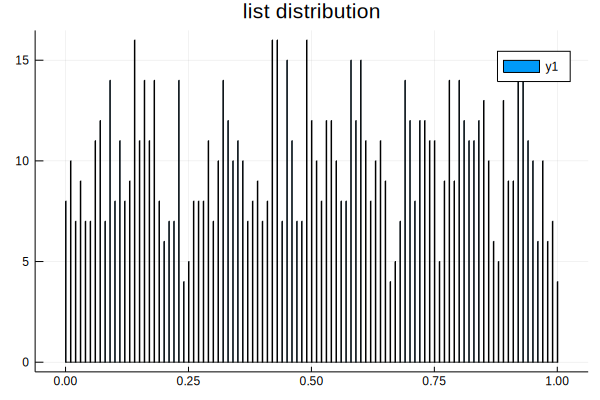

In [6]:
histogram(list, bins=N, title="list distribution")

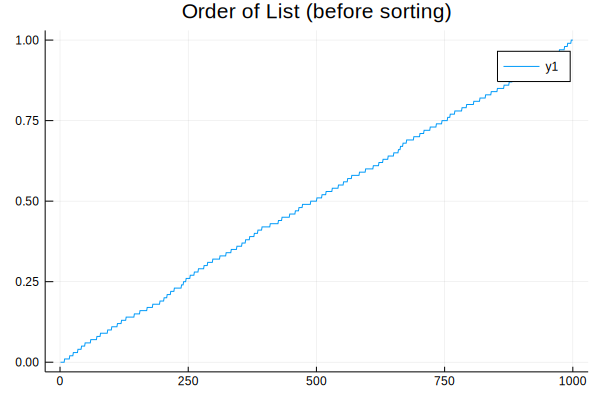

In [7]:
plot(list, title="Order of List (before sorting)")

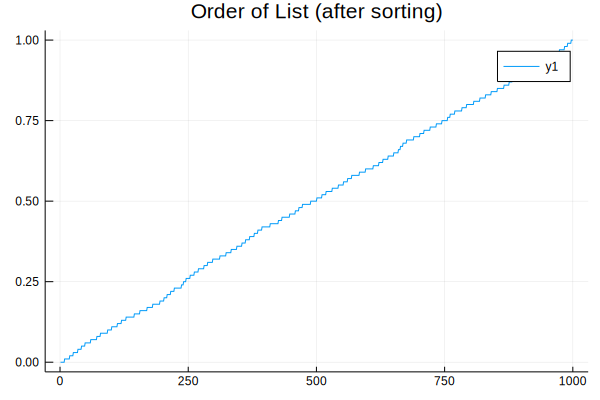

In [8]:
plot(sorted_list, title="Order of List (after sorting)")